In [1]:
# Import Library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from matplotlib.patches import ArrowStyle
from scipy import stats
from sklearn.ensemble import RandomForestClassifier

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
# Building sample model
clf= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

clf.fit(X_train, y_train)

/usr/local/var/pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [53]:
# Prediction 
pre=clf.predict_proba(X_train)
pre_pd = pd.DataFrame(pre[:,0])
pre_pd['y'] = y_train
print(pre_pd.head())

          0  y
0  0.891448  0
1  0.042604  1
2  0.467200  1
3  0.016613  1
4  0.989407  0


In [10]:

pre_good=pre_pd[pre_pd.y==0]
pre_bad=pre_pd[pre_pd.y==1]

In [41]:
# KS 
ks=stats.ks_2samp(pri_good[0].values,pri_bad[0].values)
print (ks)
print(ks[0])
print(ks[1])

Ks_2sampResult(statistic=0.7843447416355096, pvalue=5.132844304914007e-115)
0.7843447416355096
5.132844304914007e-115


In [55]:
# Score and Accumulate
cumulative_good = np.add.accumulate(pri_good) / pri_good.sum()
cumulative_good = cumulative_good[0]
score_good = pri_good.sort_values(by=0)
score_good = score_good[0]

cumulative_bad = np.add.accumulate(pri_bad) / pri_bad.sum()
cumulative_bad = cumulative_bad[0]
score_bad = pri_bad.sort_values(by=0)
score_bad = score_bad[0]

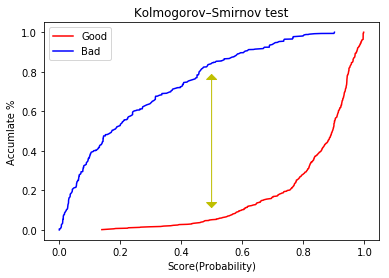

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(score_good,cumulative_good, color='r',label='Good')
ax.plot(score_bad ,cumulative_bad, color='b',label='Bad')

arrow_style_list = [
        ArrowStyle('<|-|>', head_length=1, head_width=1)
        ]
    
point = {
        'start': [0.5, 0.1],
        'end': [0.5, 0.8]
        }

ax.annotate('', xy=point['end'], xytext=point['start'], xycoords='data',
            arrowprops=dict(arrowstyle=ArrowStyle('<|-|>', head_length=0.5, head_width=0.5), 
                            connectionstyle='arc3', 
                            facecolor='y', 
                            edgecolor='y'
                           )
               )

ax.set_title('Kolmogorov–Smirnov test')
ax.set_xlabel('Score(Probability)')
ax.set_ylabel('Accumlate %')
ax.legend()


# plt.savefig('ks_graph1.png')

In [132]:
# Decile 
decile = np.arange(0.0, 1.1, 0.1)

score_good_decile = pd.DataFrame(score_good.quantile(decile))
score_bad_decile= pd.DataFrame(score_bad.quantile(decile))

score_good_decile.iloc[0,0] =0
score_good_decile.iloc[10,0] =1

print(score_good_decile)

            0
0.0  0.000000
0.1  0.598406
0.2  0.752527
0.3  0.810827
0.4  0.854746
0.5  0.894150
0.6  0.914538
0.7  0.935213
0.8  0.948343
0.9  0.974172
1.0  1.000000


In [180]:
good_df = pd.DataFrame()

for i in range(0,11):
    tmp_good_df = pri_good[pri_good[0] <=  score_good_decile.iloc[i,0]]
    a = tmp_good_df[0].count() / score_good.count()
    tmp_se = pd.Series([a])
    good_df = good_df.append( tmp_se, ignore_index=True )

good_df = good_df.rename(columns={0: 'good'})

In [162]:
bad_df = pd.DataFrame()

for i in range(0,11):
    tmp_bad_df = pri_bad[pri_bad[0] <=  score_good_decile.iloc[i,0]]
    a = tmp_bad_df[0].count() / score_bad.count()
    tmp_se = pd.Series([a])
    bad_df = bad_df.append( tmp_se, ignore_index=True )
    
bad_df = bad_df.rename(columns={0: 'bad'})

In [169]:
# Add difference
total_df = good_df
total_df['bad'] = bad_df['bad']
total_df['dif'] = bad_df['bad'] - good_df['good'] 
total_df

,good,bad,dif
0,0.000000,0,0
1,0.100182,0.880117,0.779935
2,0.200364,0.947368,0.747004
3,0.300546,0.979532,0.678986
4,0.400729,0.991228,0.590499
5,0.500911,0.994152,0.493241
6,0.599271,1,0.400729
7,0.699454,1,0.300546
8,0.799636,1,0.200364
9,0.899818,1,0.100182


In [46]:
ks = bad_df - good_df
ks_max=ks.max()[0]
ks_index=ks.idxmax()[0]

print(ks_max)
print(ks_index)

0.7799348097018503
1


In [176]:
y_start = good_df.iat[ks_index, 0]
y_end = bad_df.iat[ks_index, 0]
x_start = ks_index / 10

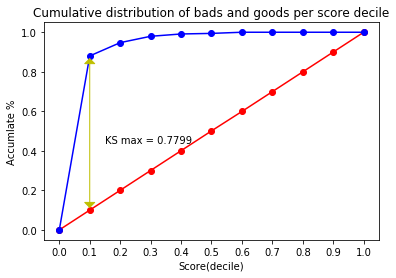

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(decile,good_df, color='r', marker='o')
ax.plot(decile,bad_df, color='b', marker='o')

arrow_style_list = [
        ArrowStyle('<|-|>', head_length=1, head_width=1)
        ]
    
point = {
        'start': [x_start, y_start],
        'end': [x_start, y_end]
        }


ax.annotate('', xy=point['end'], xytext=point['start'], xycoords='data',
            arrowprops=dict(arrowstyle=ArrowStyle('<|-|>', head_length=0.5, head_width=0.5), 
                            connectionstyle='arc3', 
                            facecolor='y', 
                            edgecolor='y'
                           )
               )

ax.text(x_start + 0.05, y_end /2, 'KS max = ' + str(f'{ks_max:.4g}'))
ax.set_xticks(decile)
ax.set_title('Cumulative distribution of bads and goods per score decile')
ax.set_xlabel('Score(decile)')
ax.set_ylabel('Accumlate %')
fig.show()

# plt.savefig('ks_graph2.png')

In [172]:
good_df2 = pre_good
good_df2['score'] = 0

bad_df2 = pre_bad
bad_df2['score'] = 0

In [173]:
for i in range(0,11):
    good_df2.loc[(good_df2[0] <=score_good_decile.iloc[i,0]) & (good_df2['score']==0) , 'score'] = i/10


for i in range(0,11):
    bad_df2.loc[(bad_df2[0] <=score_good_decile.iloc[i,0]) & (bad_df2['score']==0) , 'score'] = i/10

In [174]:
ks2=stats.ks_2samp(good_df2['score'].values,bad_df2['score'].values)
print (ks2)
print(ks2[0])
print(ks2[1])

Ks_2sampResult(statistic=0.7799348097018503, pvalue=9.8922304125642e-114)
0.7799348097018503
9.8922304125642e-114
